# <span style="color:black">Welcome to My Project Notebook </span>
### <span style="color:black">By Ronan Noonan student number G00384824 </span>
### <span style="color:black">Atlantic Technological University </span>

<hr>

## Introduction 

In this notebook, I embark on an exciting journey to unravel the intricacies of the Deutsch's algorithm. I will explain its workings, its importance in the field of quantum computing, and how it best represents the capabilities of quantum algorithms through a step-by-step investigation.

<hr>

**Imports:**

In [1093]:
from qiskit import QuantumCircuit , execute, transpile, transpile, BasicAer, Aer
from qiskit.visualization import plot_histogram
from qiskit.extensions import UnitaryGate
import matplotlib.pyplot as plt

<hr>

##  Understanding Quantum Computing

### What is Quantum Computing?
Quantum computing is a rapidly-emerging technology that allows us to solve problems too tough for regular computers. These computers use special methods called quantum algorithms to show their potential. One of the earliest and most notable of these methods is the Deutsch algorithm. It was one of the first to demonstrate the potential advantages of quantum computation over classical methods. While it might not have everyday applications, it's crucial in the quantum world. It shows how these new computers can outperform regular ones and hints at the exciting possibilities ahead.

<a href="https://www.ibm.com/topics/quantum-computing" style="color: black;">**(1) Understanding Quantum Computing** _IBM_</a> & <a href="https://www.classiq.io/insights/the-deutsch-jozsa-algorithm-explained" style="color: black;">**(2) Deutsch Algorithm** _ClassicIQ_</a>

### Why do we need quantum computers?
When confronted with challenging issues, scientists and engineers often rely on supercomputers. They use these Supercomputers, loaded with advanced CPUs and GPUs, for complex tasks. 

<a href="https://www.ibm.com/topics/quantum-computing" style="color: black;">**(1) Understanding Quantum Computing** _IBM_</a>

### Explain quantum computing
Quantum computing offers a novel approach compared to traditional methods. Rather than using bits which are 0 or 1, quantum computers operate with qubits that can be in a superposition of both states. Deutsch's algorithm exemplifies this advantage. It efficiently determines if a function is balanced or constant using just a single quantum query, whereas a classical approach would need two. This quantum efficiency is derived from principles like superposition and entanglement, which allow for advanced computational behaviors. These capabilities underscore the transformative potential of quantum computing.

<a href="https://www.qmunity.tech/tutorials/deutschs-algorithm" style="color: black;">**(3) Explain Quantum Computing** _Q-Munity_</a>

### Quantum being tested against classical
IBM's 127-qubit quantum processor was employed in a significant experiment to carry out complex calculations, later verified by classical computers for accuracy. Experts from UC Berkeley and RIKEN iTHEMS participated in this study to assess the advantages of quantum computing over traditional techniques. The outcomes showed that, especially as the complexity of the calculations rose, quantum computing has the potential to handle difficult jobs that classical computers find difficult.

<a href="https://research.ibm.com/blog/utility-toward-useful-quantum" style="color: black;">**(4) Quantum vs classical** _IBM_</a>

### Applications of Quantum Computing:

- Optimization: Improving asset pricing and budgeting methods.
- Chemistry: Simulating atomic quantum reactions.
- Material Science: Discovering new materials.
- Machine Learning: Processing vast data.
- Medicine: Modeling atomic-level molecular interactions for drug discovery.
- Security: Challenging existing cryptographic protocols.

<a href="https://jpt.spe.org/quantum-computing-emerges-game-changer" style="color: black;">**(5) Quantum Computing Emerges as a Game Changer** _JPT_</a> &

<hr>

### Explain Qubits
The fundamental unit of quantum information. Unlike regular bits (0 or 1), a qubit can represent both simultaneously due to superposition. This is why quantum computers can process vast amount of information.
#### Superposition:
Superposition allows a qubit to be in multiple states at the same time, a key feature that enables quantum computers to perform multiple calculations simultaneously.
#### Entanglement:
A phenomenon where two or more Qubits become interconnected, the state of one qubit is dependent on the state of another, no matter the distance between them. Changes to one particle instantly affect the others, providing quantum computers additional power.

<a href="https://www.educative.io/blog/intro-to-quantum-computing" style="color: black;">**(6) Qubits, superposition & Entanglement** _educative_</a>

<hr>

## Quantum Gates and the Deutsch Algorithm
So we have figured out that Quantum computing operates fundamentally differently than classical computing. Instead of the classical bits, it employs qubits, which are manipulated using quantum gates. Unlike classical gates like AND, OR, and NOT, quantum gates utilize the principles of superposition and entanglement to allow for a richer computational framework. A crucial quantum gate used in many quantum algorithms, including Deutsch's, is the Hadamard gate, denoted as H. This gate can put a qubit in a superposition of both ∣0⟩ and ∣1⟩ states. Combined with other gates such as the phase gate, CNOT, and π/8, we can build a 'universal set' of quantum gates, allowing quantum computers to potentially simulate any physical system and provide new insights into our universe's workings.

The Deutsch algorithm specifically utilizes the Hadamard gate to create and manipulate superpositions, aiding in distinguishing between constant and balanced functions in a single query.

Here's a simple Python code snippet using Qiskit to demonstrate the application of a Hadamard gate: 

<a href="https://techcommunity.microsoft.com/t5/educator-developer-blog/quantum-gates-and-circuits-the-crash-course/ba-p/380463" style="color: black;">**(7) Quantum-Gates-and-Circuits** _Anita Ramanan First published on MSDN on Feb 26, 2018_</a>

c:\Users\ronan\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


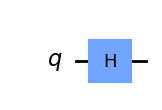

In [1094]:
# Using Qiskit to apply a Hadamard gate

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Apply the Hadamard gate to the qubit
qc.h(0)

# Display the circuit
qc.draw('mpl')

<hr>


## Deutsch's Algorithm

Deutsch's Algorithm is a important quantum algorithm that showcases the capabilities and power of quantum computing for specific computational tasks. It's designed to figureout what the binary function is $f: \{0,1\} \rightarrow \{0,1\}$ with a single query to a quantum oracle. The algorithm can determine whether the given function is the same output for both inputs or different outputs for each input. This can also be said as constant(same) or balanced(different). What is the problem addressed by Deutsch's Algorithm?

The problem addressed by Deutsch's Algorithm can be stated as follows:

Given A black-box quantum oracle implementing a function $f: \{0,1\} \rightarrow \{0,1\}$ We know this function is guaranteed to be either constant or balanced. A constant function will return the same value either 0 or 1 for both inputs 0 and 1. A balanced function returns opposite values for each input 0 for one input and 1 for the other.  <br>
The Objective is to Determine whether the function $f$ is constant or balanced.

In classical computing, determining the nature of this function would typically require two queries – one for each input. However, as we have seen with quantum computing we can achieve this with a single query. This shows how quantum computing solves certain problems better than clasical computing. The algorithm operates by mixing two quantum bits into a special quantum state and then applying a specific quantum operation to represent the function. At the end, by measuring these quantum bits, the algorithm figures out if the function always gives the same result or different results for different inputs.

<a href="https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#deutschs-algorithm" style="color: black;">**(8) Deutsch's Algorithm** _IBM_</a>

#### Comparative Analysis with Classical Algorithms
In this section, we're comparing two methods to solve the same problem: one using quantum computing (Deutsch's Algorithm) and the other using traditional computing (a classical algorithm). The focus is on how many steps (queries) each method needs and how efficient they are.

#### Classical Algorithm Implementation in Python
First, let's look at the classical way. It checks if a given function always gives the same result (constant) or different results (balanced).

In [1095]:
# Function to test if another function is constant or balanced
def classical_test(function):
    return "Constant" if function(0) == function(1) else "Balanced"

# Example: A function that always returns 0
def constant_function(x):
    return 0

# Example: A function that returns the input (0 or 1)
def balanced_function(x):
    return x

# Let's see what the classical_test says about these functions
print("Constant Function Test:", classical_test(constant_function))
print("Balanced Function Test:", classical_test(balanced_function))


Constant Function Test: Constant
Balanced Function Test: Balanced


#### Efficiency Comparison
* **Classical Approach:** Needs to check the function twice.
* **Deutsch's Algorithm:** Figures out the answer with just one check.
#### Conclusion
By comparing these two methods, we see that quantum computing can be more efficient for certain tasks. Deutsch's Algorithm does the job quicker, needing fewer steps than the classical method.

<hr>

### Implementing Deutsch's Algorithm Using Qiskit

 Let's use everything we've learned about Deutsch's Algorithm and the theoretical components of quantum computing. Deutsch's Algorithm will be implemented with Qiskit, a potent quantum computing tool.

**Step by Step implementation**

**_STEP 1:_ Constructing the Quantum Circuit for Deutsch's Algorithm** <br>
The first step involves building the quantum circuit. We know that Deutsch's Algorithm uses a two-qubit system. The first qubit is the input qubit, and the second is an auxiliary qubit. We apply Hadamard gates to both qubits to create superpositions and then apply the oracle.

In [1096]:
# Function to construct Deutsch's Algorithm Circuit
def deutsch_circuit(oracle):
    qc = QuantumCircuit(2, 1)

    # Prepare the second qubit in the |1> state
    qc.x(1)

    # Apply Hadamard gates to both qubits
    qc.h(0)
    qc.h(1)
    qc.barrier()

    # Compose the quantum circuit with the oracle
    qc = qc.compose(oracle)
    qc.barrier()

    # Apply Hadamard to the first qubit and measure
    qc.h(0)
    qc.measure(0, 0)
    return qc


**_STEP 2: Defining the Oracle** <br>
Defined two types of oracles: constant and balanced.


In [1097]:
# Define a constant oracle
def constant_oracle():
    return QuantumCircuit(2)

# Define a balanced oracle
def balanced_oracle():
    qc = QuantumCircuit(2)
    # CNOT gate to create a correlation between the qubits
    qc.cx(0, 1)
    return qc

**_STEP 3:_ Visualizing the Circuit** <br>
Let's visualize the quantum circuits for both the constant and balanced oracles. This helps in understanding how the oracles are constructed and integrated into the overall circuit.

Constant Oracle Circuit:


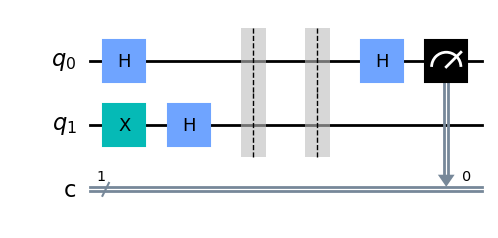

Balanced Oracle Circuit:


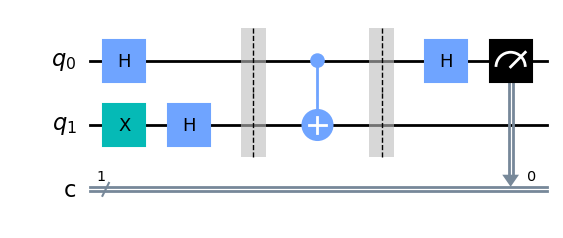

In [1098]:
# Constant Oracle
constant_circuit = deutsch_circuit(constant_oracle())
print("Constant Oracle Circuit:")
display(constant_circuit.draw(output='mpl', style='clifford'))

# Balanced Oracle
balanced_circuit = deutsch_circuit(balanced_oracle())
print("Balanced Oracle Circuit:")
display(balanced_circuit.draw(output='mpl', style='clifford'))

**_STEP 4:_ Running the Circuit and Analyzing Results** <br>
Now, we execute the circuits for both constant and balanced oracles using a quantum simulator. The results are displayed as histograms, which reveal whether the oracle is constant or balanced based on the measurement outcomes.

Result for Constant Oracle:


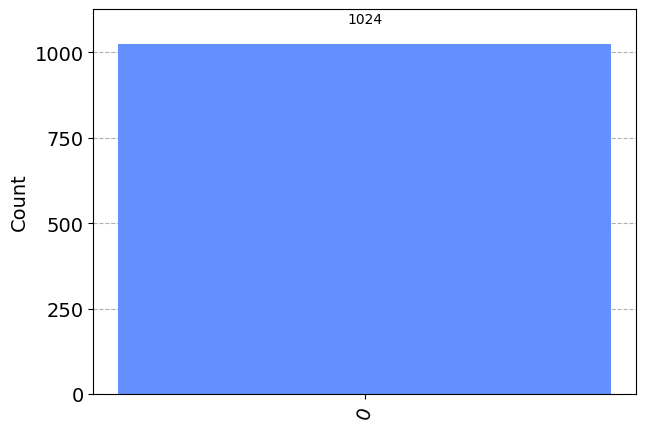

Result for Balanced Oracle:


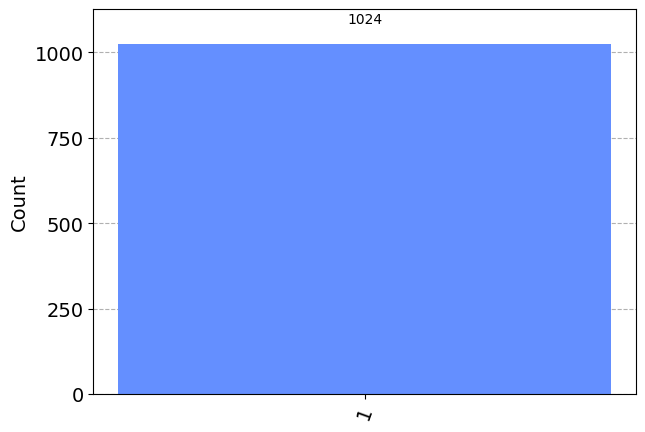

In [1099]:
backend = Aer.get_backend('qasm_simulator')

# Execute Constant Oracle Circuit
result_constant = execute(constant_circuit, backend, shots=1024).result()
counts_constant = result_constant.get_counts()
print("Result for Constant Oracle:")
display(plot_histogram(counts_constant))

# Execute Balanced Oracle Circuit
result_balanced = execute(balanced_circuit, backend, shots=1024).result()
counts_balanced = result_balanced.get_counts()
print("Result for Balanced Oracle:")
display(plot_histogram(counts_balanced))


## Conclusion and Evaluation of Results

The histograms for the constant and balanced oracle circuits provide insights into the oracles. For a constant oracle, we expect all measurements to be the same (either all 0s or all 1s), while for a balanced oracle, we expect a 50-50 distribution between 0s and 1s. This demonstrates the effectiveness of Deutsch's Algorithm in distinguishing between constant and balanced functions, highlighting the quantum advantage in certain computational tasks.

<hr>

### Implementing the Deutsch-Jozsa Algorithm Using Qiskit

**Step by Step implementation**

**_STEP 1:_ Constructing the Quantum Circuit for Deutsch-Jozsa Algorithm** <br>
The Deutsch-Jozsa algorithm is executed on a quantum circuit that includes both qubits for computation and classical bits for measurement. The circuit begins with all qubits in the superposition state, followed by the application of the oracle, and finally another set of Hadamard gates before measurement.

In [1100]:
# Function to construct Deutsch-Jozsa Algorithm Circuit
def deutsch_jozsa_circuit(oracle, n):
    qc = QuantumCircuit(n+1, n)

    # Preparing the auxiliary qubit in the |1> state
    qc.x(n)

    # Applying Hadamard gates to all qubits
    qc.h(range(n+1))
    qc.barrier()

    # Adding the oracle to the circuit
    qc = qc.compose(oracle)
    qc.barrier()

    # Applying Hadamard gates to all computational qubits and measuring
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

**_STEP 2:_ Defining the Oracle** <br>
Define two types of oracles: one for constant functions and another for balanced functions.

In [1101]:
# Define a constant oracle for n qubits
def constant_oracle(n):
    return QuantumCircuit(n+1)

# Define a balanced oracle for n qubits
def balanced_oracle(n):
    qc = QuantumCircuit(n+1)
    # Apply CNOT gates to create entanglement and a balanced function
    for qubit in range(n):
        qc.cx(qubit, n)
    return qc


**_STEP 3:_ Visualizing the Circuit** <br>
Visualizing the circuit for both constant and balanced oracles helps us understand the structure of the algorithm and the role of the oracles.

Constant Oracle Circuit:


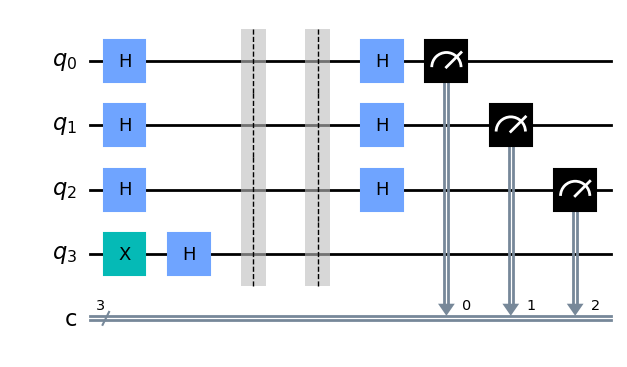

Balanced Oracle Circuit:


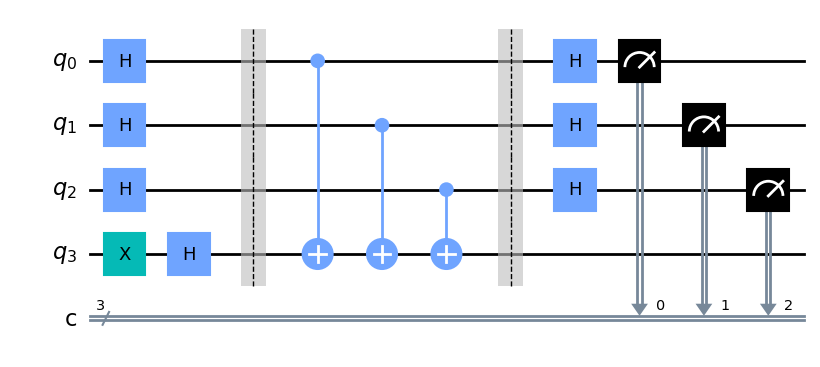

In [1102]:
n = 3  # Specify the number of qubits

# Visualize the circuit for the Constant Oracle
constant_circuit = deutsch_jozsa_circuit(constant_oracle(n), n)
print("Constant Oracle Circuit:")
display(constant_circuit.draw(output='mpl', style='clifford'))

# Visualize the circuit for the Balanced Oracle
balanced_circuit = deutsch_jozsa_circuit(balanced_oracle(n), n)
print("Balanced Oracle Circuit:")
display(balanced_circuit.draw(output='mpl', style='clifford'))


**_STEP 4:_ Running the Circuit and Observing the Result** <br>
We execute the circuits for both constant and balanced oracles on a quantum simulator. The results are analyzed through histograms to determine the nature of the oracle.

Result for Constant Oracle:


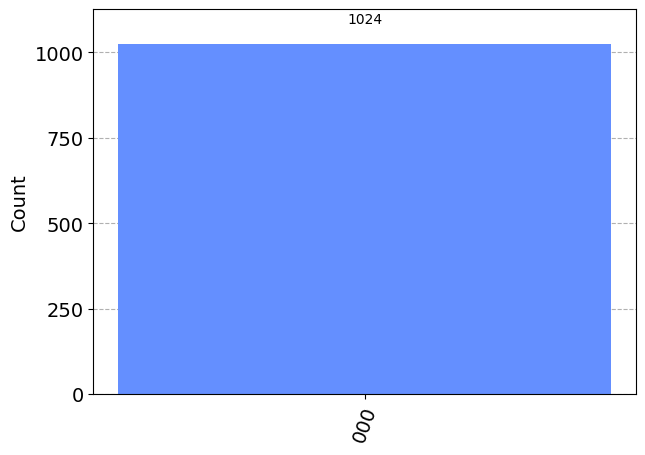

Result for Balanced Oracle:


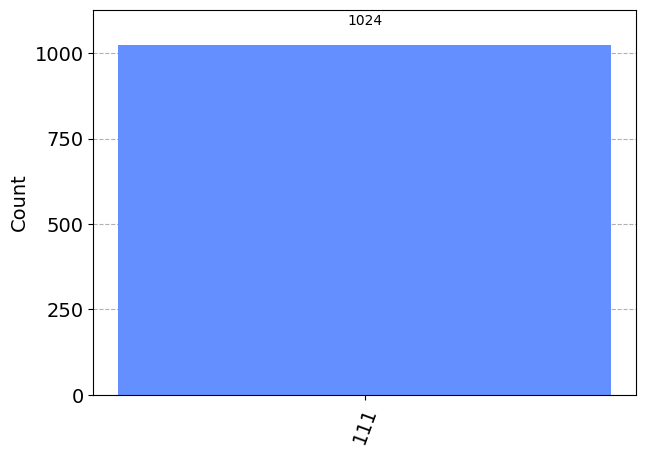

In [1103]:
# Set up the quantum simulator backend
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit for the Constant Oracle and analyze results
result_constant = execute(constant_circuit, backend, shots=1024).result()
counts_constant = result_constant.get_counts()
print("Result for Constant Oracle:")
display(plot_histogram(counts_constant))

# Execute the circuit for the Balanced Oracle and analyze results
result_balanced = execute(balanced_circuit, backend, shots=1024).result()
counts_balanced = result_balanced.get_counts()
print("Result for Balanced Oracle:")
display(plot_histogram(counts_balanced))


## Conclusion and Evaluation of Results

The results clearly demonstrate the power of the Deutsch-Jozsa Algorithm. For a constant oracle, all outputs are the same, whereas for a balanced oracle, we see an equal distribution of outputs. This stark difference, evident in the histograms, showcases the quantum advantage in determining the nature of a function with a single evaluation, something that would require multiple evaluations in classical computing.


<a href="https://www.youtube.com/watch?v=pq2Okr_BO-Y" style="color: red;">**(9) Implementation of Deutsch--Josza Algorithm in Qiskit** _Quantum Computing group at LUMS_</a>

<hr>

## Quantum entanglement in quantum computers 

### Introduction to Quantum Entanglement
Quantum entanglement is an important aspect of quantum computing. When qubits become entangled, the state of one qubit is directly correlated with the state of another, no matter the distance between them.

### Entanglement in Deutsch's Algorithm
Deutsch's Algorithm relies heavily on entanglement. Entanglement lets the algorithm work on multiple inputs at the same time, thanks to superposition. This is different from basic superposition, where a single qubit can be in several states at once.

Demonstrating the creation of a simple entangled state using Qiskit:

_STEP 1_: Creating the Quantum Circuit

In [1104]:
# Create a quantum circuit with 2 qubits and 2 classical bits for measurement
entanglement_circuit = QuantumCircuit(2, 2)

_STEP 2_: Applying Hadamard and CNOT Gates

In [1105]:
# Apply a Hadamard gate to the first qubit to create a superposition
entanglement_circuit.h(0)
# Apply a CNOT gate to entangle the two qubits
entanglement_circuit.cx(0, 1);

_STEP 3_: Measuring Qubits

In [1106]:
# Measure both qubits
entanglement_circuit.measure([0,1], [0,1]);

_STEP 4_: Drawing the Circuit

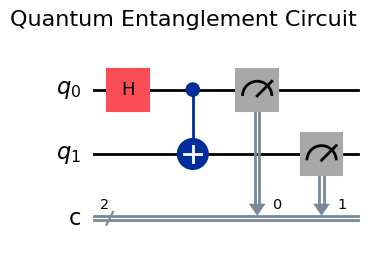

In [1107]:
# Draw the circuit using the specified style to avoid the FutureWarning
entanglement_circuit_figure = entanglement_circuit.draw(output='mpl', style='iqp')

# Set a title for the figure
entanglement_circuit_figure.suptitle("Quantum Entanglement Circuit", fontsize=16)

# Display the circuit diagram (In Jupyter Notebook, this line may not be necessary)
display(entanglement_circuit_figure)


_STEP 5_: Executing the Circuit on a Simulator

In [1108]:
# Use BasicAer's qasm_simulator to execute the circuit
simulator = BasicAer.get_backend('qasm_simulator')

_STEP 6_: Running the Circuit and Observing Results

In [1109]:
# Run the circuit on the simulator and collect the results
result = execute(entanglement_circuit, backend=simulator, shots=1024).result()

_STEP 7_: Extracting Counts

In [1110]:
# Extract the counts of each result 
counts_entanglement = result.get_counts(entanglement_circuit)

_STEP 8_: Plotting Histogram

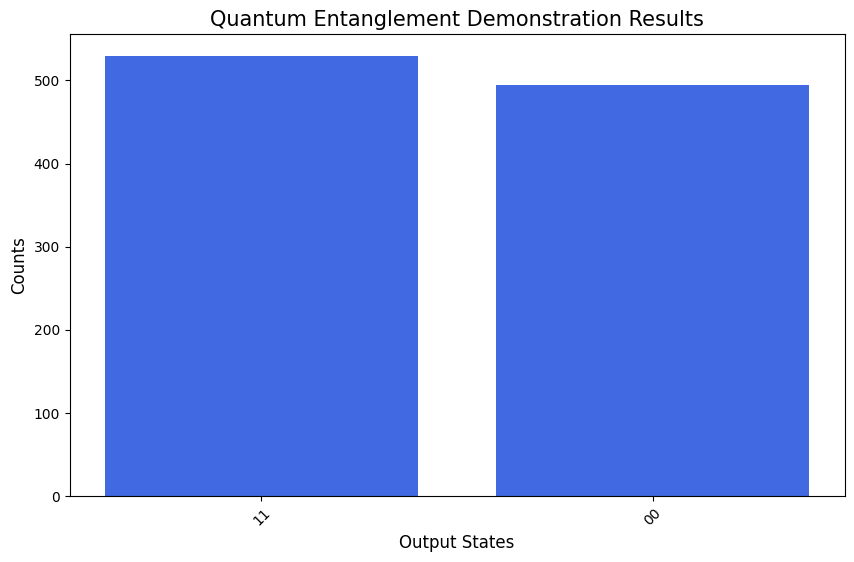

In [1111]:

# Plot the histogram using Matplotlib for a customized appearance
plt.figure(figsize=(10, 6))
plt.bar(counts_entanglement.keys(), counts_entanglement.values(), color='royalblue')
plt.xlabel('Output States', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Quantum Entanglement Demonstration Results", fontsize=15)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()  # Display the histogram

#### Evaluation of Results
The executed quantum entanglement circuit produced measurement results, and the corresponding histogram provides insights into the entangled states of the qubits. The output states and their counts indicate the outcome of the entanglement experiment.

#### Conclusion
The example effectively explains the fundamental idea behind quantum entanglement. No matter how far apart two qubits are from one another, their states are intimately connected when they are entangled. The entangled states that were obtained throughout the quantum circuit's execution are displayed in the histogram's observed outcomes.

The first step in utilizing the special powers of quantum computers to solve complicated problems faster than traditional computers is to comprehend and utilize entanglement.

<hr>

## Conclusion
In the exploration of quantum computing

 **Key Findings**

## <span style="color: black;">References</span>

1. https://www.ibm.com/topics/quantum-computing <span style="color: black;">Understanding Quantum Computing</span>
2. https://www.classiq.io/insights/the-deutsch-jozsa-algorithm-explained <span style="color: black;">Deutch Algorithm</span>
3. https://www.qmunity.tech/tutorials/deutschs-algorithm" <span style="color: black;">Explain Quantum computing</span>
4. https://research.ibm.com/blog/utility-toward-useful-quantum <span style="color: black;">Quantum vs Classical</span>
5. https://jpt.spe.org/quantum-computing-emerges-game-changer <span style="color: black;">Quantum Computing Emerges as a Game Changer</span>
6. https://www.educative.io/blog/intro-to-quantum-computing <span style="color: black;">Qubits, superposition & Entanglement</span>
7.  https://techcommunity.microsoft.com/t5/educator-developer-blog/quantum-gates-and-circuits-the-crash-course/ba-p/380463 <span style="color: black;">Quantum-Gates-and-Circuits</span>
8.  https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#deutschs-algorithm <span style="color: black;">Deutsch's Algorithm</span>
<!-- 9.  https://quantuc.org/index.php/courses/introductory-quantum-computing/ <span style="color: black;">Introductory Quantum Computing</span> -->


## <span style="color: red;">Videos</span>

9. https://www.youtube.com/watch?v=pq2Okr_BO-Y <span style="color: red;">Implementation of Deutsch--Josza Algorithm in Qiskit</span>